# Running TFLite models

## Setup

In [1]:
!pip3 install -q tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 61kB/s 
     |████████████████████████████████| 501kB 40.7MB/s 
     |████████████████████████████████| 3.1MB 28.1MB/s 


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

import pathlib
import matplotlib.pyplot as plt
from google.colab import files

%matplotlib inline

## Create a basic model of the form y = mx + c

In [3]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 1s 106ms/sample - loss: 46.1384
Epoch 2/200
6/6 [==============================] - 0s 1ms/sample - loss: 36.6787
Epoch 3/200
6/6 [==============================] - 0s 777us/sample - loss: 29.2285
Epoch 4/200
6/6 [==============================] - 0s 962us/sample - loss: 23.3594
Epoch 5/200
6/6 [==============================] - 0s 704us/sample - loss: 18.7344
Epoch 6/200
6/6 [==============================] - 0s 458us/sample - loss: 15.0883
Epoch 7/200
6/6 [==============================] - 0s 669us/sample - loss: 12.2126
Epoch 8/200
6/6 [==============================] - 0s 448us/sample - loss: 9.9431
Epoch 9/200
6/6 [==============================] - 0s 832us/sample - loss: 8.1507
Epoch 10/200
6/6 [==============================] - 0s 721us/sample - loss: 6.7338
Epoch 11/200
6/6 [==============================] - 0s 590us/sample - loss: 5.6124
Epoch 12/200
6/6 [==============================] - 0s 799us/sample - lo

## Generate a SavedModel

In [0]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

## Convert the SavedModel to TFLite

In [0]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

692

## Initialize the TFLite interpreter to try it out

In [0]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

## Visualize the model

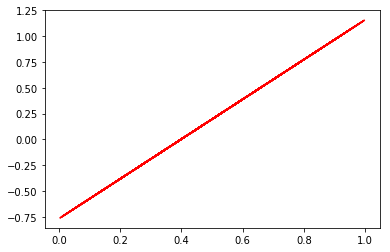

In [9]:
plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite model file

In [0]:
files.download(tflite_model_file)